In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
unique_mice = merged_data_df["Mouse ID"].unique()
unique_mice
len(unique_mice)

249

In [3]:
merged_data_df['Mouse ID'].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_data_df.loc[merged_data_df.duplicated(), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
duplicate_mouse = merged_data_df.loc[merged_data_df["Mouse ID"] == "g989", :]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
updated_merged_data = merged_data_df.loc[merged_data_df['Mouse ID'] != "g989"]
updated_merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
unique_updated_data = updated_merged_data["Mouse ID"].unique()
len(unique_updated_data)

248

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_mice = updated_merged_data[["Drug Regimen","Tumor Volume (mm3)"]]
mean_mice = mean_mice.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume'})
mean_mice = mean_mice.groupby(["Drug Regimen"]).mean()

median_mice = updated_merged_data[["Drug Regimen","Tumor Volume (mm3)"]]
median_mice = median_mice.rename(columns={'Tumor Volume (mm3)': 'Median Tumor Volume'})
median_mice = median_mice.groupby(["Drug Regimen"]).median()

var_mice = updated_merged_data[["Drug Regimen","Tumor Volume (mm3)"]]
var_mice = var_mice.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Variance'})
var_mice = var_mice.groupby(["Drug Regimen"]).var()

std_mice = updated_merged_data[["Drug Regimen","Tumor Volume (mm3)"]]
std_mice = std_mice.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Std. Dev.'})
std_mice = std_mice.groupby(["Drug Regimen"]).std()

sem_mice = updated_merged_data[["Drug Regimen","Tumor Volume (mm3)"]]
sem_mice = sem_mice.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Std. Err.'})
sem_mice = sem_mice.groupby(["Drug Regimen"]).sem()

regimen_stats = pd.merge(mean_mice, median_mice, on=["Drug Regimen"])
regimen_stats = pd.merge(regimen_stats, var_mice, on=["Drug Regimen"])
regimen_stats = pd.merge(regimen_stats, std_mice, on=["Drug Regimen"])
regimen_stats = pd.merge(regimen_stats, sem_mice, on=["Drug Regimen"])
regimen_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

agg_summary = (updated_merged_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]).aggregate(["mean", "median", "var", "std", "sem"])
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


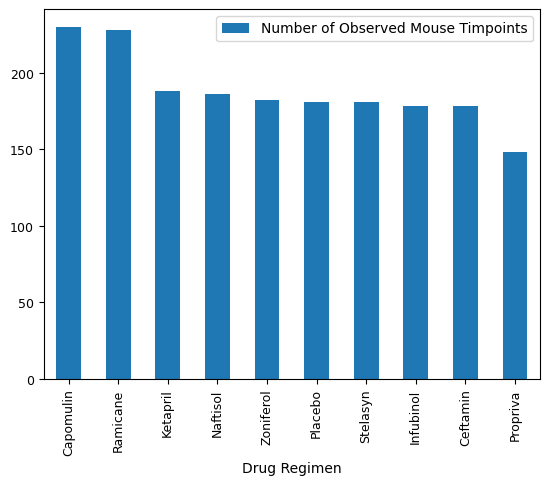

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_rows = updated_merged_data["Drug Regimen"].value_counts()
timepoint_count = pd.DataFrame(total_rows)
timepoint_count = timepoint_count.reset_index()

timepoint_count = timepoint_count.rename(columns={"index": "Drug Regimen", "Drug Regimen": "Number of Observed Mouse Timpoints"})
                                         
bargraph = timepoint_count.plot.bar(x="Drug Regimen", y="Number of Observed Mouse Timpoints", fontsize='9')




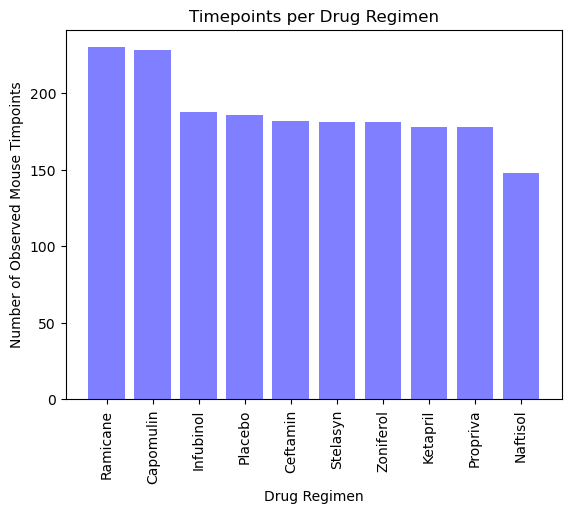

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = updated_merged_data["Drug Regimen"].unique()
y_axis = updated_merged_data["Drug Regimen"].value_counts()
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")

plt.xticks(rotation=90)
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timpoints")
plt.show()

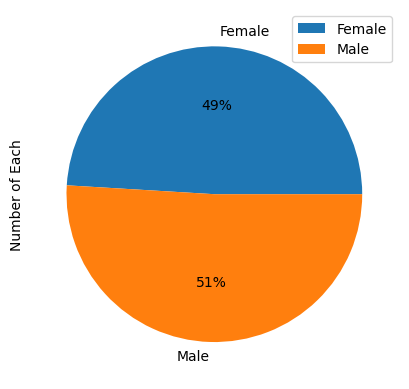

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
total_sex = updated_merged_data["Sex"].value_counts()
gender_count = pd.DataFrame(total_sex)
gender_count = gender_count.reset_index()

gender_count = gender_count.rename(columns={"index": "Sex", "Sex": "Number of Each"})

gender_count = gender_count.groupby(['Sex']).sum().plot(kind='pie', y='Number of Each', autopct='%1.0f%%')

([<matplotlib.patches.Wedge at 0x19a12ae1b70>,
 [Text(-0.7433500820741923, -0.942035379102235, 'Male'),
  Text(0.6814042419013431, 0.8635324308437154, 'Female')],
 [Text(-0.43362088120994546, -0.549520637809637, '51.0%'),
  Text(0.3716750410370962, 0.47101768955111745, '49.0%')])

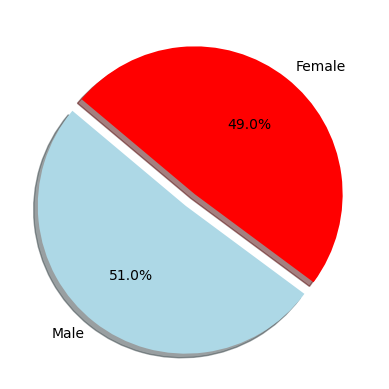

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = updated_merged_data["Sex"].value_counts()
colors = ["lightblue", "red"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = updated_merged_data.groupby(updated_merged_data["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_timepoint = greatest_timepoint.reset_index()
tumor_max = pd.merge(greatest_timepoint, updated_merged_data, on = ["Mouse ID", "Timepoint"])
tumor_max

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_by_drug = tumor_max.loc[tumor_max["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(tumor_by_drug)
    
    quartiles = tumor_by_drug.quantile([.25, .5, .75])
    lower_q = quartiles[.25]
    upper_q = quartiles[.75]
    iqr = upper_q - lower_q
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    
    outliers = tumor_by_drug.loc[(tumor_by_drug > upper_bound) | (tumor_by_drug < lower_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

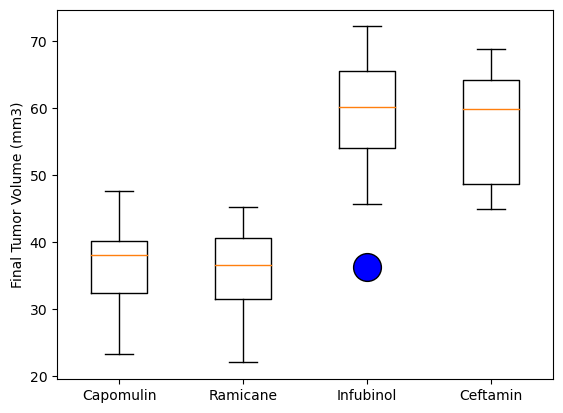

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outlier_style = dict(markerfacecolor="blue", marker='o', markersize = 20)
plt.boxplot(tumor_vol, labels = drugs, flierprops = outlier_style)
plt.ylabel("Final Tumor Volume (mm3)")

Text(0.5, 1.0, 'Capomulin Treatment: l509')

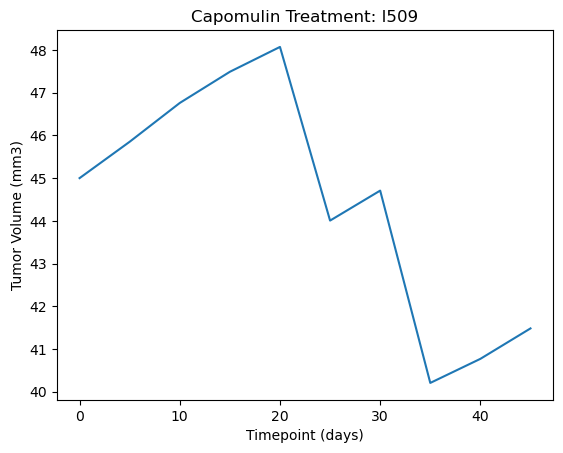

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
sliced_data = updated_merged_data[updated_merged_data["Drug Regimen"] == "Capomulin"]
the_mouse = sliced_data["Mouse ID"].unique()[21]

x_axis = sliced_data[sliced_data["Mouse ID"] == the_mouse]["Timepoint"]
y_axis = sliced_data[sliced_data["Mouse ID"] == the_mouse]["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin Treatment: {the_mouse}")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

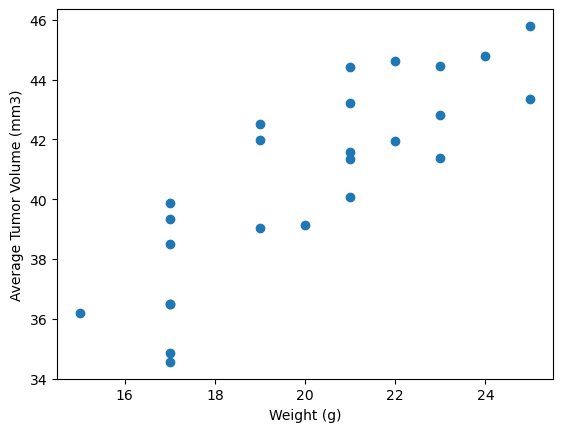

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight = sliced_data.groupby(["Mouse ID"])["Weight (g)"].unique()
avg_tumor_volume = sliced_data.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

plt.scatter(weight, avg_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

The correlation between mouse weight and average tumor volume is  0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

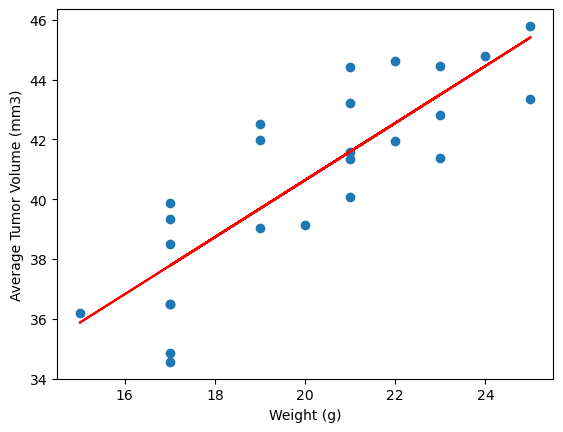

In [31]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

r = st.pearsonr(weight.astype(int), avg_tumor_volume)
print(f"The correlation between mouse weight and average tumor volume is {r[0]: .2f}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight.astype(int), avg_tumor_volume)

regress_values = weight * slope + intercept
line_eq = f"y = {slope: .2f}x +{intercept: .2f}"

plt.plot(weight, regress_values, "r-")
plt.scatter(weight, avg_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")